In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("main_df_sunderbans.csv")
cols = data.columns

In [3]:
data_main = data[cols[:3]]
data_main.head(3)

,Year,Month,mean
0,1993,1,-9.852119
1,1993,2,-9.963833
2,1993,3,-9.856525


In [4]:
data = data_main.copy()

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

data.set_index('Date', inplace=True)

In [5]:
data_new = pd.DataFrame({'Date': data.index, 'mean': data['mean']})

data_new = data_new[data_new['mean'] >= -50]

data_new.head(5)

,Date,mean
Date,,
1993-01-01,1993-01-01,-9.852119
1993-02-01,1993-02-01,-9.963833
1993-03-01,1993-03-01,-9.856525
1993-04-01,1993-04-01,-9.925649
1993-05-01,1993-05-01,-9.439488


In [16]:
time_series = data_new['mean']

scaler = MinMaxScaler(feature_range=(0, 1))

time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))
time_series_scaled = pd.Series(time_series_scaled.flatten(), index=time_series.index)

train_size = int(len(time_series_scaled) * 1)


train = time_series_scaled[:train_size]

In [26]:
model = SARIMAX(train, order=(1, 0, 2), seasonal_order=(1, 0, 2, 30))
model_fit = model.fit(disp=False)

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
forecast_values = model_fit.forecast(steps=36).to_numpy()


/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


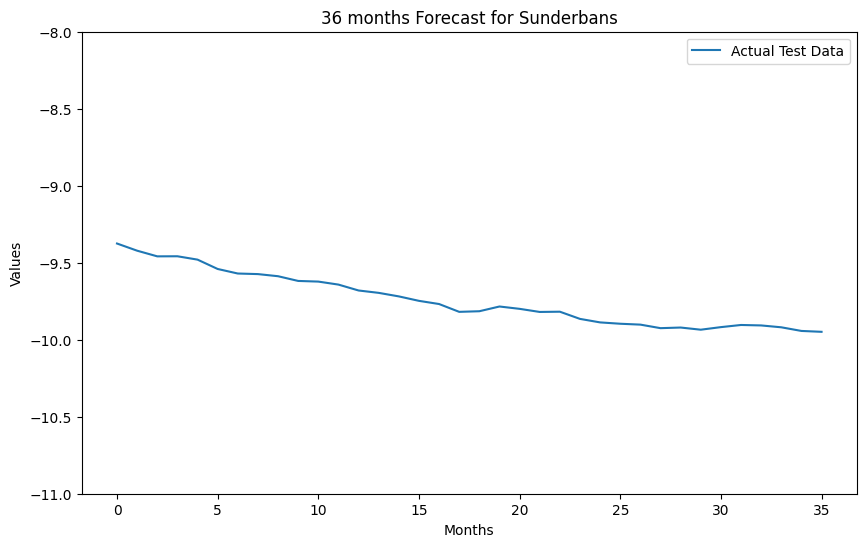

In [32]:
forecast_scaled = scaler.inverse_transform(forecast_values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(forecast_scaled, label='Actual Test Data')


plt.ylim(-11, -8)
plt.title('36 months Forecast for Sunderbans')
plt.xlabel('Months')
plt.ylabel('Values')
plt.legend()

plt.show()